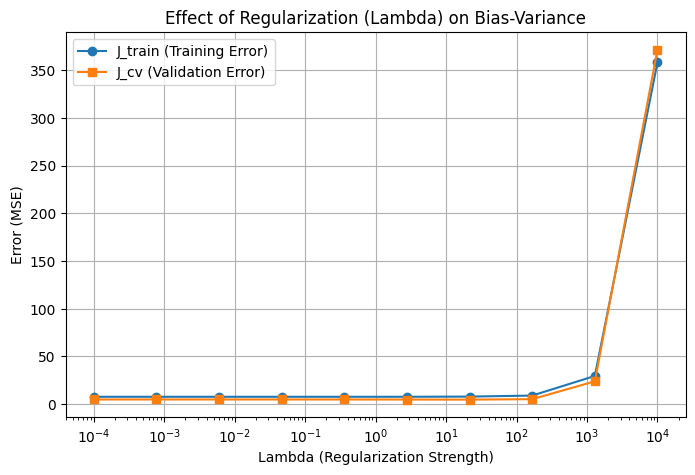

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ✅ 1. Генерируем данные
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Входные данные (100 точек)
y = X**4 - 3*X**3 + X**2 + np.random.normal(0, 3, X.shape)  # Полином 4-й степени + шум

# ✅ 2. Разделяем на train и validation
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 3. Полиномиальные признаки 4-й степени
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)

# ✅ 4. Перебираем значения регуляризации λ (Lambda)
lambdas = np.logspace(-4, 4, 10)  # От 10^(-4) до 10^4
J_train = []
J_cv = []

for lmb in lambdas:
    model = Ridge(alpha=lmb)  # Ridge-регрессия (L2-регуляризация)
    model.fit(X_train_poly, y_train)
    
    # Вычисляем ошибку
    J_train.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    J_cv.append(mean_squared_error(y_cv, model.predict(X_cv_poly)))

# ✅ 5. Строим график зависимости J_train и J_cv от Lambda
plt.figure(figsize=(8, 5))
plt.plot(lambdas, J_train, label="J_train (Training Error)", marker="o")
plt.plot(lambdas, J_cv, label="J_cv (Validation Error)", marker="s")
plt.xscale("log")  # Логарифмическая шкала
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Error (MSE)")
plt.title("Effect of Regularization (Lambda) on Bias-Variance")
plt.legend()
plt.grid(True)
plt.show()

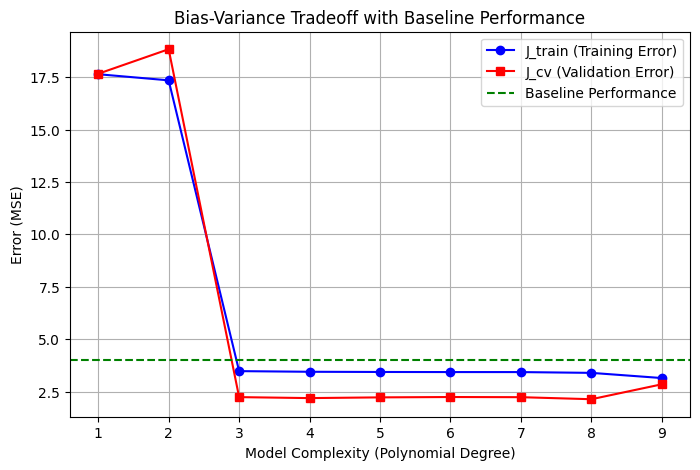

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ✅ 1. Генерируем искусственные данные (пример задачи распознавания речи)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Входные данные (100 точек)
y = X**3 - 3*X + np.random.normal(0, 2, X.shape)  # Кубическая зависимость + шум

# ✅ 2. Разделяем на train и validation
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ 3. Определяем базовый уровень производительности
baseline_performance = 4.0  # Например, человеческий уровень ошибки (для задачи распознавания речи)

# ✅ 4. Перебираем степени полинома (модельной сложности)
degrees = range(1, 10)  # От линейной до 9-й степени
J_train = []
J_cv = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)
    
    # Вычисляем ошибку обучения и валидации
    J_train.append(mean_squared_error(y_train, model.predict(X_train)))
    J_cv.append(mean_squared_error(y_cv, model.predict(X_cv)))

# ✅ 5. Строим график ошибок J_train, J_cv и базового уровня производительности
plt.figure(figsize=(8, 5))
plt.plot(degrees, J_train, label="J_train (Training Error)", marker="o", color="blue")
plt.plot(degrees, J_cv, label="J_cv (Validation Error)", marker="s", color="red")
plt.axhline(y=baseline_performance, color="green", linestyle="--", label="Baseline Performance")  # Линия базового уровня

plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error (MSE)")
plt.title("Bias-Variance Tradeoff with Baseline Performance")
plt.legend()
plt.grid(True)
plt.show()